In [3]:
# === Task 1: Student Score Prediction (Linear Regression) ===
# Requirements: pandas, numpy, matplotlib, scikit-learn

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
# Load dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

# ----- Task 1: Simple Linear Regression -----
# Feature & Target
X = df[['Hours_Studied']]
y = df['Exam_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [13]:
# Metrics
print("Task 1 - Simple Linear Regression")
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Task 1 - Simple Linear Regression
Intercept: 61.511167469044246
Coefficient: 0.2856687444430867
Mean Squared Error: 10.85592128879332
R² Score: 0.2319868674542106


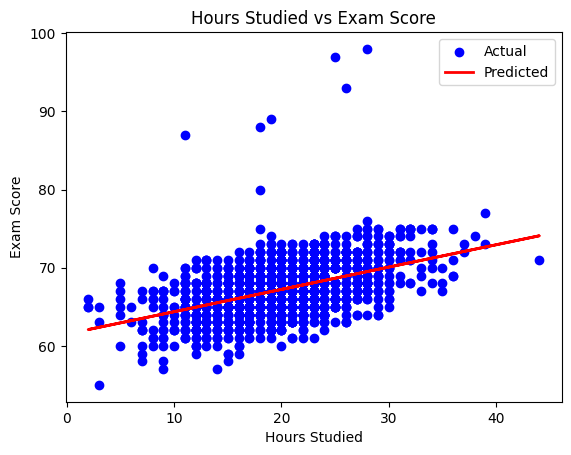

In [14]:
# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Hours Studied vs Exam Score')
plt.legend()
plt.show()

In [15]:
# ----- Bonus Task: Multiple Linear Regression -----
features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours']
X_multi = df[features]
y_multi = df['Exam_Score']

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Model training
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

# Predictions
y_pred_m = model_multi.predict(X_test_m)

In [16]:
# Metrics
print("\nBonus Task - Multiple Linear Regression")
print("Intercept:", model_multi.intercept_)
print("Coefficients:", dict(zip(features, model_multi.coef_)))
print("Mean Squared Error:", mean_squared_error(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))


Bonus Task - Multiple Linear Regression
Intercept: 42.27642993890964
Coefficients: {'Hours_Studied': np.float64(0.28770398974512124), 'Attendance': np.float64(0.1990080768076991), 'Previous_Scores': np.float64(0.047378706190095876), 'Sleep_Hours': np.float64(-0.03668513404178918)}
Mean Squared Error: 5.345751105427533
R² Score: 0.6218094307179827


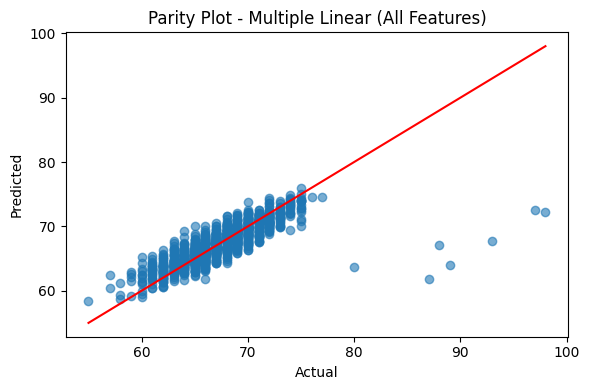

In [20]:
# Bonus Parity plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test_m, y_pred_m, alpha=0.6)
a, b = min(y_test_m.min(), y_pred_m.min()), max(y_test_m.max(), y_pred_m.max())
plt.plot([a, b], [a, b], color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Parity Plot - Multiple Linear (All Features)")
plt.tight_layout()
plt.show()